In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.special as sps
import pandas as pd

n_tup = (5, 10, 20, 50, 100)
domain = np.linspace(0, 1, 500)
TETA_list = (0.1, 0.4, 0.48, 0.51)

In [32]:
#6.3a
df = pd.DataFrame(columns=['n', 'P(T_2 closer then T_1)', 'TETA'])
for TETA in TETA_list:
    for n in n_tup:
        positive = 0
        for i in range(100):
            sample = sts.bernoulli.rvs(TETA, size=n)
            T_1 = np.mean(sample)
            T_2 = T_1 + (0.5 - T_1)/(1 + n**(0.5))
            if abs(T_2 - TETA) < abs(T_1 - TETA):
                positive += 1
        df_buf = pd.DataFrame({'n': [n], 'P(T_2 closer then T_1)': [positive/100], 'TETA': [TETA]})
        df = df.append(df_buf)
display(df)

,n,P(T_2 closer then T_1),TETA
0,5,0.50,0.10
0,10,0.36,0.10
0,20,0.42,0.10
0,50,0.27,0.10
0,100,0.34,0.10
0,5,0.68,0.40
0,10,0.54,0.40
0,20,0.59,0.40
0,50,0.49,0.40
0,100,0.55,0.40


In [33]:
def mean_square_risk(t, n):
    return (t-t*t)/n
def mean_abs_risk(t, n):
    return 0
def le_kh_abs_risk(t, n):
    Ex = 0
    for k in range(n+1):
        Ex += abs(((k*(2+2*((n)**(0.5)) - 2*n) + n)/((2+2*((n)**(0.5)))*n)) - t)*sps.binom(n, k)*(t**k)*((1-t)**(n-k))
    return Ex
def le_kh_square_risk(t, n):
    #t2 = (t*t + (t*(1-t))/n)
    #n1 = 1 + n**(0.5)
    #return t2 - (2*t2)/n1 + 1/(4*(n1)**2) - t/(n1**2) + t2/(n1**2) + ((t**2)*(1 - n**(0.5)))/n1
    return 1/(4*(1 + n**(0.5))**2)

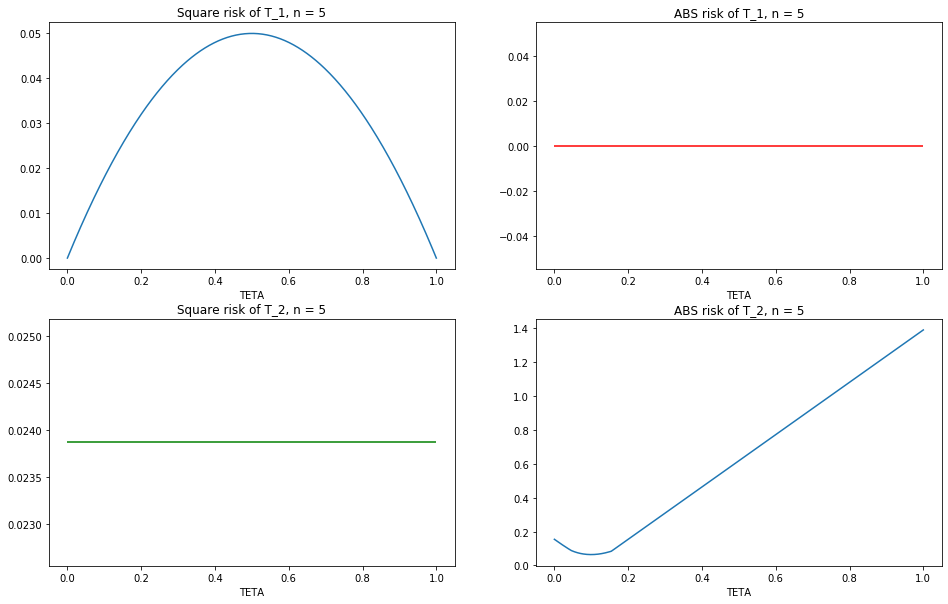

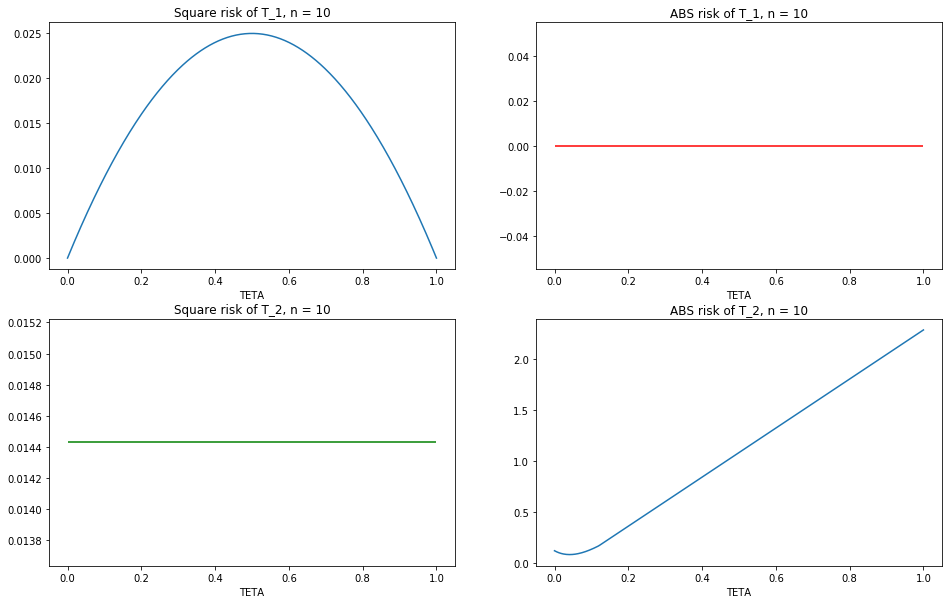

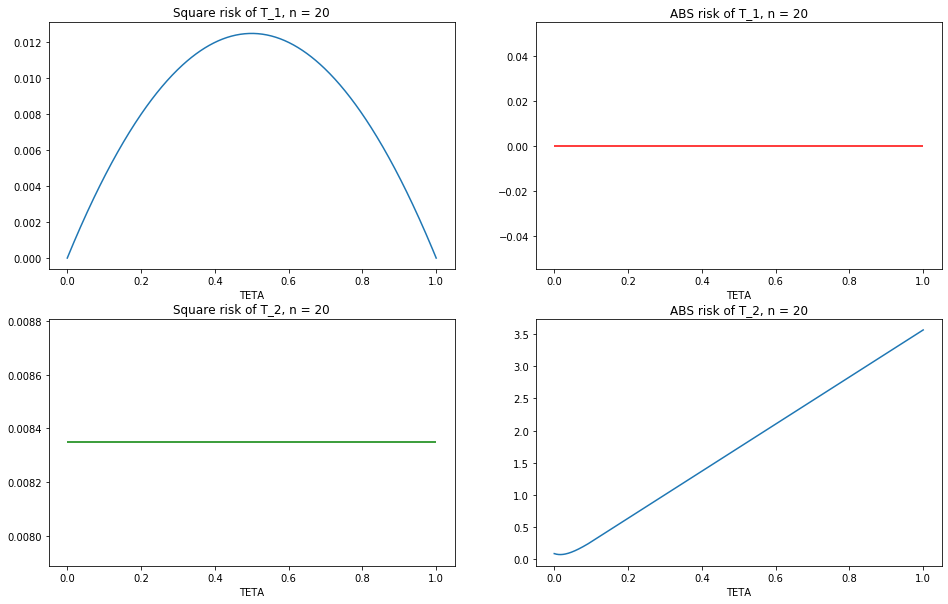

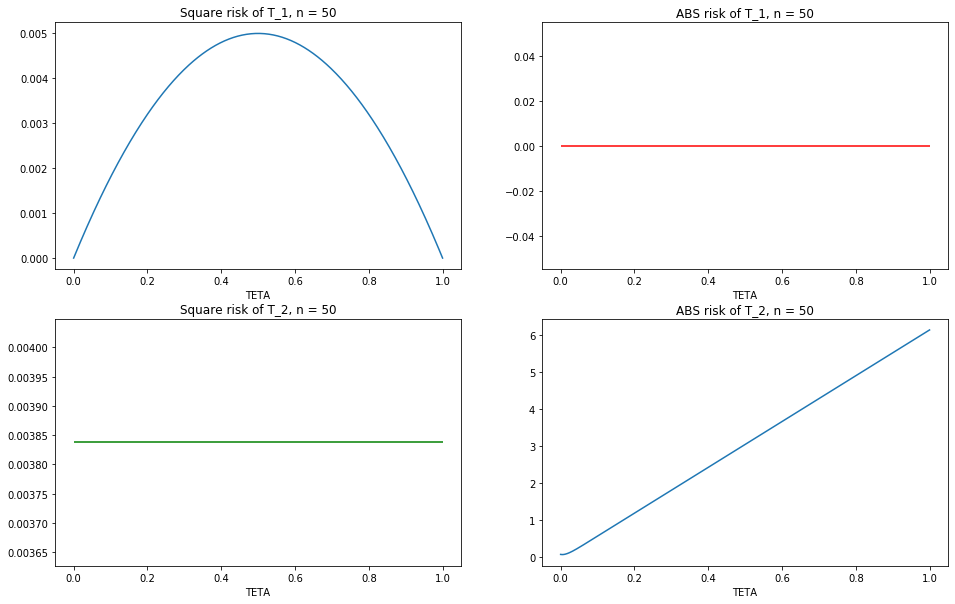

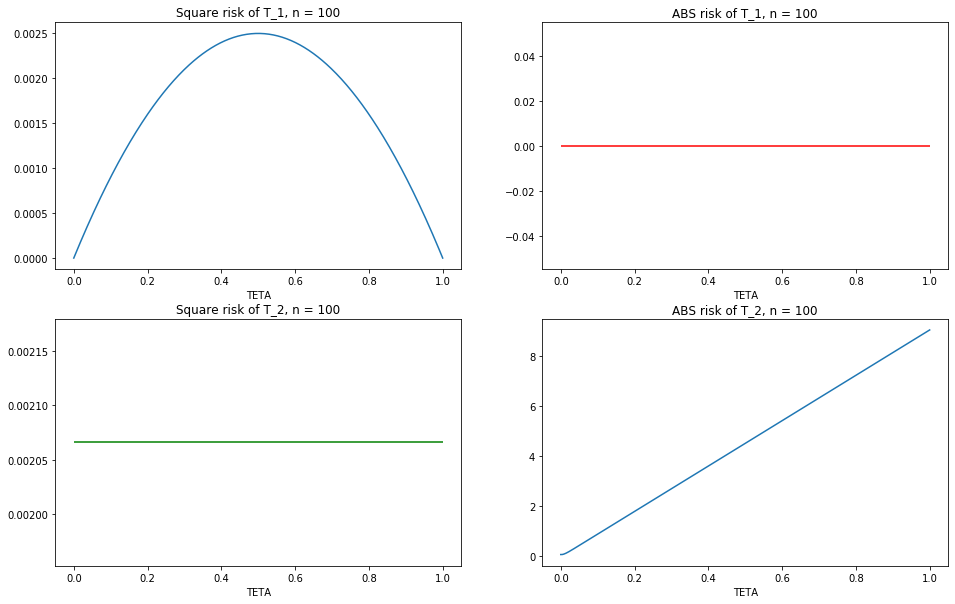

In [34]:
for n in n_tup:
    figure = plt.figure(figsize=(16,10))
    plt.subplot(2, 2, 1)
    plt.plot(domain, mean_square_risk(domain, n))
    plt.title('Square risk of T_1, n = ' + str(n))
    plt.xlabel('TETA')
    
    plt.subplot(2, 2, 2)
    plt.hlines(0, 0, 1, colors='r')
    plt.title('ABS risk of T_1, n = ' + str(n))
    plt.xlabel('TETA')
    
    plt.subplot(2, 2, 3)
    #plt.plot(domain, le_kh_square_risk(domain, n))
    plt.hlines(1/(4*(1 + n**(0.5))**2), 0, 1, colors='g')
    plt.title('Square risk of T_2, n = ' + str(n))
    plt.xlabel('TETA')
    
    plt.subplot(2, 2, 4)
    plt.plot(domain, le_kh_abs_risk(domain, n))
    plt.title('ABS risk of T_2, n = ' + str(n))
    plt.xlabel('TETA')
    
    plt.show()